# Modules and settings

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

sns.set()
plt.rcParams["figure.figsize"] = (20,10)

# Import, clean, split data

In [411]:
data_generation1 = pd.read_csv('Plant_1_Generation_Data.csv')
data_weather1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
data_generation1['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], format='%d-%m-%Y %H:%M', dayfirst=True)
data_weather1['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], format='%d-%m-%Y %H:%M', dayfirst=True)
data_generation1['HOUR_MINUTE'] = data_generation1['DATE_TIME'].dt.strftime('%H:%M')

unique_dates = data_generation1['DATE_TIME'].dt.date.unique()
# unique_dates.sort()
days_for_split = math.ceil(len(unique_dates)/2)
dates_first_half = unique_dates[:days_for_split]
dates_second_half = unique_dates[days_for_split:]
data_generation1_first_half = data_generation1[data_generation1['DATE_TIME'].dt.date.isin(dates_first_half)].copy()
print(f"First half: {data_generation1_first_half.iloc[0]['DATE_TIME']} to {data_generation1_first_half.iloc[-1]['DATE_TIME']}")
data_generation1_second_half = data_generation1[data_generation1['DATE_TIME'].dt.date.isin(dates_second_half)].copy()
print(f"Second half: {data_generation1_second_half.iloc[0]['DATE_TIME']} to {data_generation1_second_half.iloc[-1]['DATE_TIME']}")

First half: 2020-05-15 00:00:00 to 2020-05-31 23:45:00
Second half: 2020-06-01 00:00:00 to 2020-06-17 23:45:00


In [429]:
print(data_generation1.loc[1000])
print()
print(data_weather1.loc[1000])

DATE_TIME      2020-05-15 11:30:00
PLANT_ID                   4135001
SOURCE_KEY         ZnxXDlPa8U1GXgE
DC_POWER               6904.571429
AC_POWER                676.071429
DAILY_YIELD            2281.142857
TOTAL_YIELD            6524453.143
HOUR_MINUTE                  11:30
Name: 1000, dtype: object

DATE_TIME              2020-05-15 11:30:00
PLANT_ID                           4135001
SOURCE_KEY                 HmiyD2TTLFNqkNe
AMBIENT_TEMPERATURE              22.083634
MODULE_TEMPERATURE               19.613255
IRRADIATION                            0.0
Name: 1000, dtype: object


# Plot

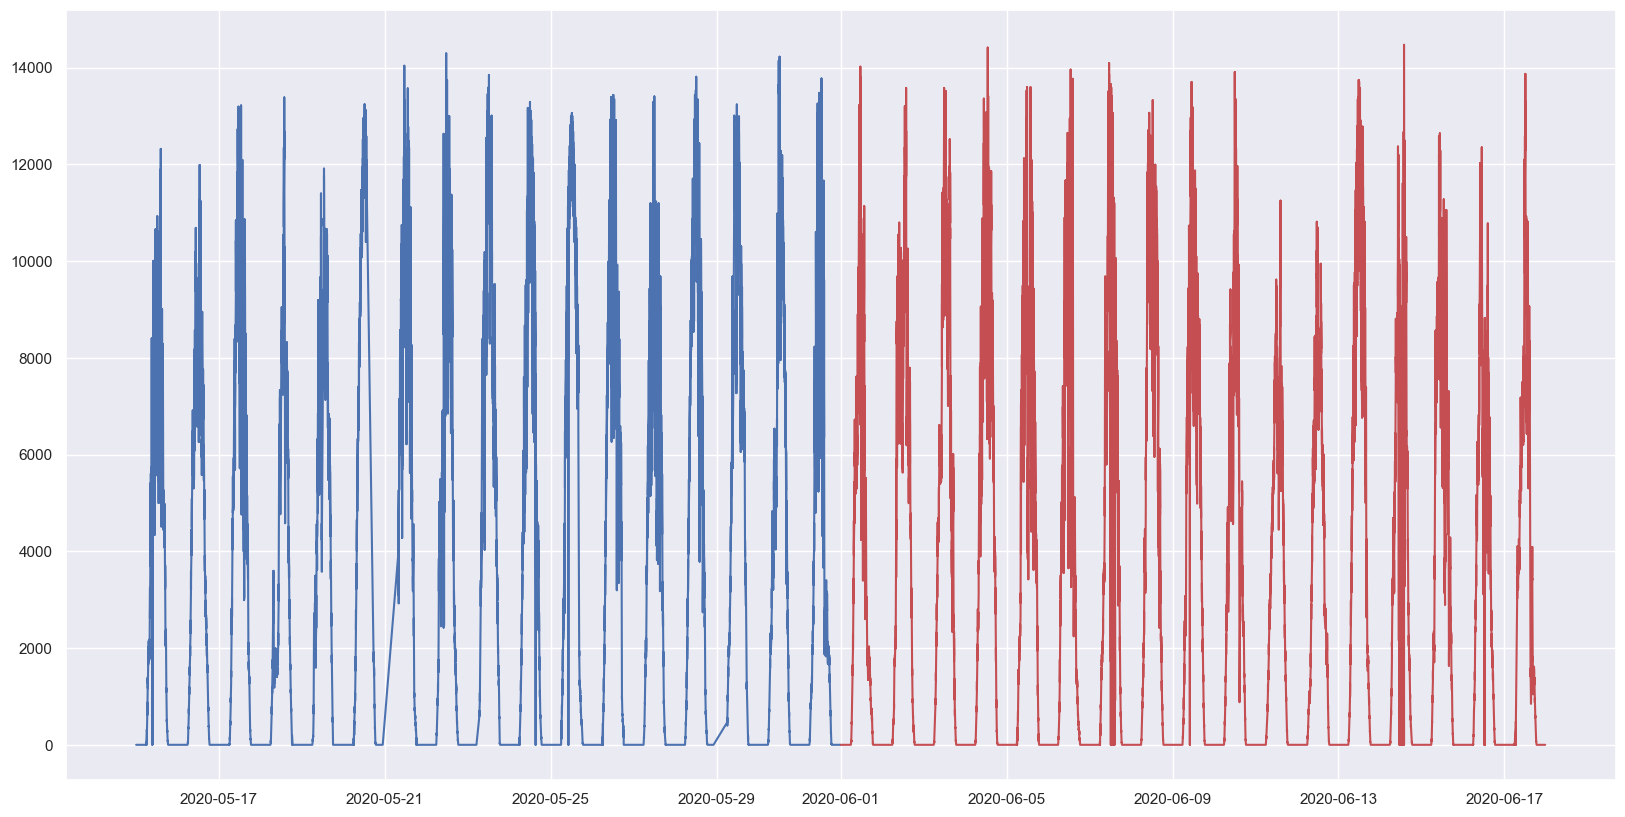

In [408]:
x = data_generation1_first_half['DATE_TIME']
y = data_generation1_first_half['DC_POWER']
plt.plot(x,y,c='b')
x = data_generation1_second_half['DATE_TIME']
y = data_generation1_second_half['DC_POWER']
plt.plot(x,y,c='r')
plt.show()

# Daily sums and averages

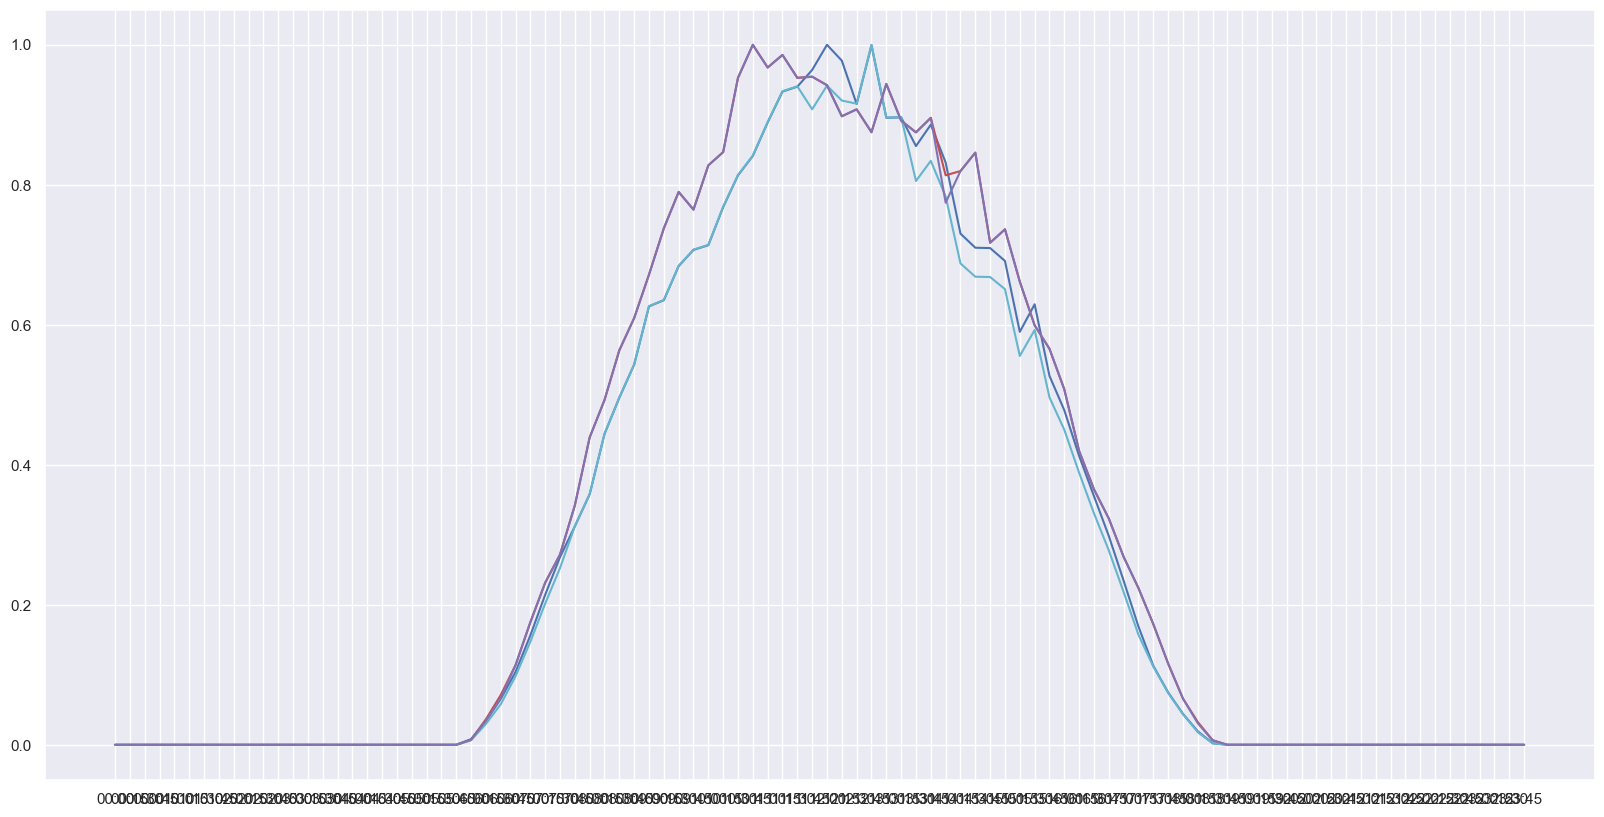

In [409]:
scaler = MinMaxScaler()

data_generation1_first_half_avg = data_generation1_first_half[['HOUR_MINUTE','DC_POWER']].groupby('HOUR_MINUTE').mean().reset_index()
data_generation1_second_half_avg = data_generation1_second_half[['HOUR_MINUTE','DC_POWER']].groupby('HOUR_MINUTE').mean().reset_index()

x = data_generation1_first_half_avg['HOUR_MINUTE']
y = pd.DataFrame(scaler.fit_transform(data_generation1_first_half_avg[['DC_POWER']]))
# y = data_former_avg['DC_POWER']
plt.plot(x,y,c='b')

x = data_generation1_second_half_avg['HOUR_MINUTE']
# y = data_latter_avg['DC_POWER']
y = pd.DataFrame(scaler.fit_transform(data_generation1_second_half_avg[['DC_POWER']]))
plt.plot(x,y,c='r')

data_generation1_first_half_sum = data_generation1_first_half[['HOUR_MINUTE','DC_POWER']].groupby('HOUR_MINUTE').sum().reset_index()
data_generation1_second_half_sum = data_generation1_second_half[['HOUR_MINUTE','DC_POWER']].groupby('HOUR_MINUTE').sum().reset_index()

x = data_generation1_first_half_sum['HOUR_MINUTE']
y = pd.DataFrame(scaler.fit_transform(data_generation1_first_half_sum[['DC_POWER']]))
# y = data_former_sum['DC_POWER']
plt.plot(x,y,c='c')

x = data_generation1_second_half_sum['HOUR_MINUTE']
# y = data_latter_sum['DC_POWER']
y = pd.DataFrame(scaler.fit_transform(data_generation1_second_half_sum[['DC_POWER']]))
plt.plot(x,y,c='m')

plt.show()

# Add weather data

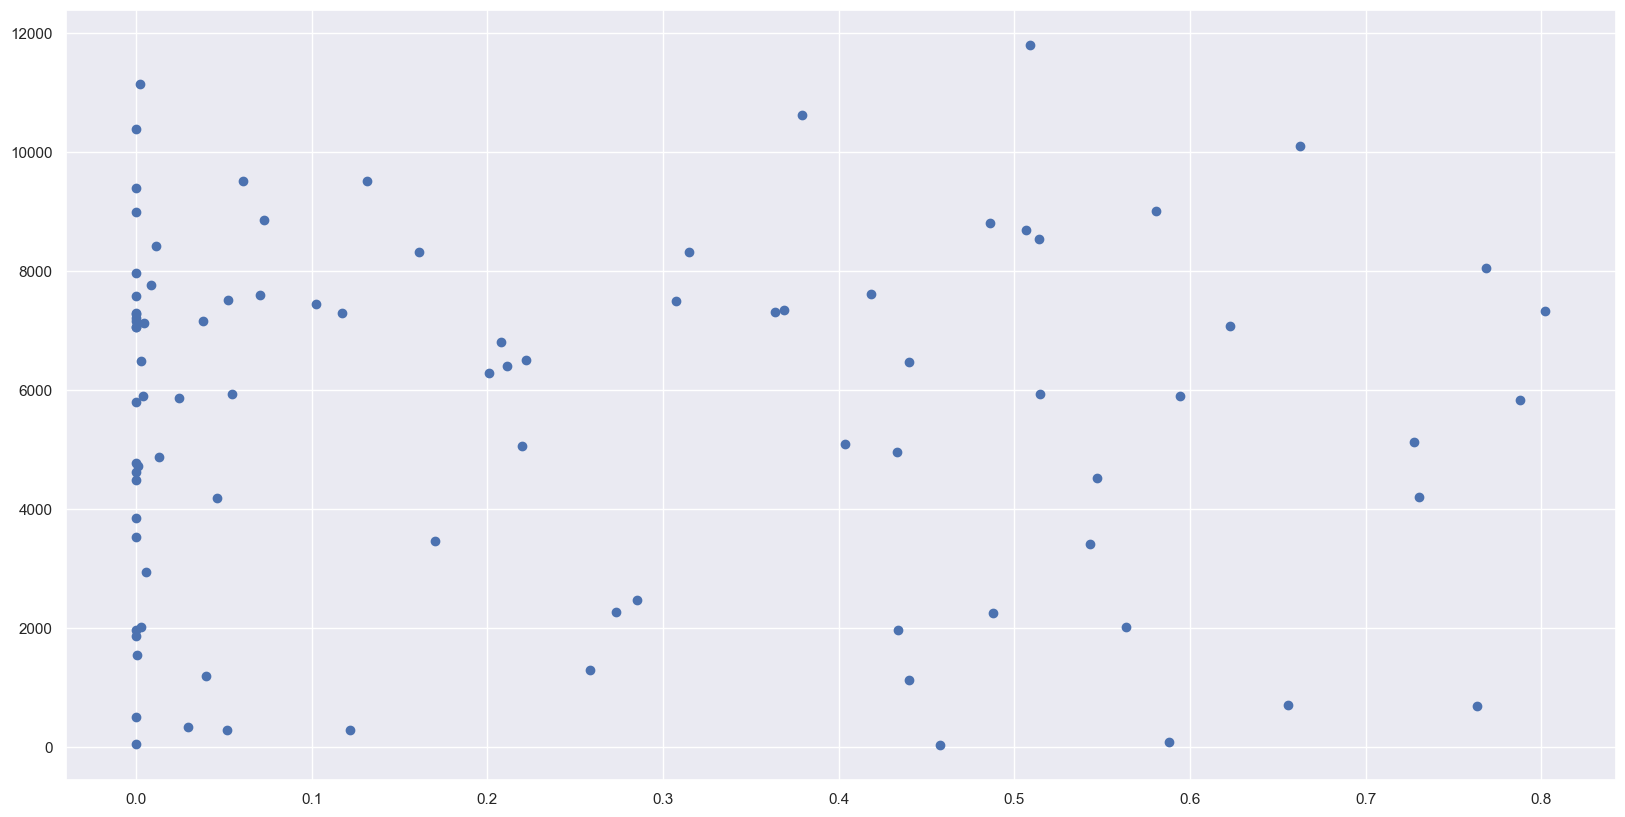

In [420]:
# data_generation1.reset_index(inplace=True)
# data_weather1.reset_index(inplace=True)
data_generation1_filtered = data_generation1[['DATE_TIME','DC_POWER']].copy()
data_generation1_filtered = data_generation1_filtered.groupby('DATE_TIME').mean().reset_index()
data_weather1_filtered = data_weather1[['DATE_TIME','IRRADIATION']].copy()
data_weather1_filtered = data_weather1_filtered.groupby('DATE_TIME').mean().reset_index()
# data_generation1.reset_index(inplace=True)
# data_weather1.reset_index(inplace=True)
data_generation1_filtered.set_index('DATE_TIME', inplace=True)
data_weather1_filtered.set_index('DATE_TIME', inplace=True)
data_plant1 = pd.concat([data_generation1_filtered, data_weather1_filtered], axis=1)
data_plant1.reset_index(inplace=True)
data_plant1_dropna = data_plant1.dropna()
data_plant1_active = data_plant1_dropna[data_plant1_dropna['IRRADIATION']>0]
data_plant1_active = data_plant1_dropna[data_plant1_dropna['DC_POWER']>0]
x = data_plant1_active['IRRADIATION']
y = data_plant1_active['DC_POWER']
plt.scatter(x,y)
plt.show()